# The Mode

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [2]:
import pandas as pd

In [3]:
houses = pd.read_table('AmesHousing_1.txt')

In [4]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
houses['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

'Gtl' means gentle slope, 'Mod' means moderate slope, and 'Sev' stands for 'Severe slope'

In [10]:
houses['Roof Style'].unique()

array(['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], dtype=object)

In [11]:
houses['Kitchen AbvGr'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
scale_land = 'ordinal'
scale_roof = 'nominal'
kitchen_variable = 'discrete'

### The Mode for Ordinal Variables

In [14]:
houses['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [16]:
# Defining a Mode function

def mode(array):
    counts = {}
    for a in array:
        if a in counts:
            counts[a] += 1
        else:
            counts[a] = 1
            
    return max(counts, key = counts.get)

In [17]:
mode_function = mode(houses['Land Slope'])
mode_function

'Gtl'

In [18]:
mode_method = houses['Land Slope'].mode()
mode_method

0    Gtl
dtype: object

In [23]:
same = (mode_function == mode_method)
same

0    True
dtype: bool

### The Mode for Nominal Variables

In [25]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [26]:
# Editing the mode function so it also returns the counts dictionary

def mode(array):
    counts = {}
    for a in array:
        if a in counts:
            counts[a] += 1
        else:
            counts[a] = 1
            
    return (max(counts, key = counts.get), counts)

In [27]:
mode, value_counts = mode(houses['Roof Style'])

In [28]:
mode

'Gable'

In [29]:
value_counts

{'Hip': 551,
 'Gable': 2321,
 'Mansard': 11,
 'Gambrel': 22,
 'Shed': 5,
 'Flat': 20}

### The Mode for Discrete Variables

In [31]:
houses['Kitchen AbvGr'].value_counts().sort_index()

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64

In [33]:
houses['Bedroom AbvGr'].unique()

array([3, 2, 1, 4, 6, 5, 0, 8], dtype=int64)

In [34]:
bedroom_variable = 'discrete'

In [35]:
bedroom_mode = houses['Bedroom AbvGr'].mode()
bedroom_mode

0    3
dtype: int64

### The Mode for Discrete Variables

In [36]:
houses['SalePrice'].unique()

array([215000, 105000, 172000, ...,  90500,  71000, 150900], dtype=int64)

In [37]:
price_variable = 'continuous'

In [38]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [39]:
# Find the class interval with the highest frequency, then find its midpoint.
midpoint = 150000

In [40]:
mean = houses['SalePrice'].mean()
mean

180796.0600682594

In [41]:
median = houses['SalePrice'].median()
median

160000.0

The mode is lower than the median, and the median is lower than the mean.

The mean is greater than the median, and the median is greater than the mode.

### Skewed Distributions

In [42]:
import matplotlib.pyplot as plt

#### Rigt-skew distribution

In a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode.

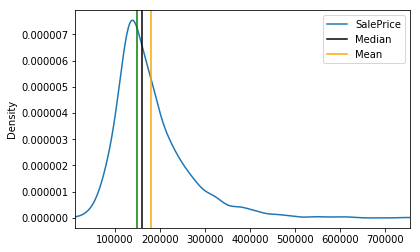

In [52]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))
plt.axvline(150000, color = 'Green')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

#### Left-skew distribution

For a left-skewed distribution, the mean is positioned to the left of the median, and the median to the left of the mode.

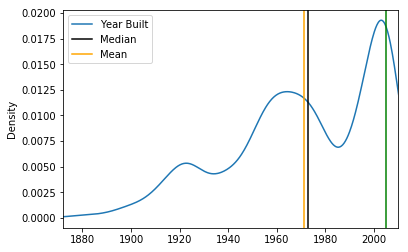

In [51]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),houses['Year Built'].max()))
plt.axvline(2005, color = 'Green')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

In [53]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

shape_1 = 'right skew'
shape_2 = 'right skew'
shape_3 = 'left skew'

### Symmetrical Distributions

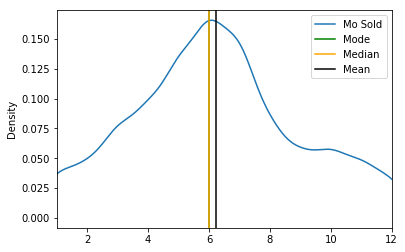

In [56]:
houses['Mo Sold'].plot.kde(xlim=(1,12))
plt.axvline(houses['Mo Sold'].mode()[0], color='Green', label='Mode')
plt.axvline(houses['Mo Sold'].median(), color='Orange', label='Median')
plt.axvline(houses['Mo Sold'].mean(), color='Black', label='Mean')
plt.legend()
plt.show()